In [ ]:
#Importing all the necessary packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve,average_precision_score,plot_precision_recall_curve,plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, plot_confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.datasets import make_blobs
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential, load_model
from keras import layers
from keras.layers.core import Dropout
from keras.callbacks import ModelCheckpoint

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving QRFINALDATA!!.csv to QRFINALDATA!! (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['QRFINALDATA!!.csv']))
df

,PIN,Sex,Region,Year,Grade,HSG,IndGrd2,AC1,AC2,SAT,IndGrd
0,N313106412255,M,Southeast Asia,ay1415,83.660000,3,91.575000,"Philosophy, Politics and Economics",Undeclared,770,1.0
1,N303108421205,M,Singapore,ay1415,82.399000,4,78.237500,Global Affairs,Psychology,680,0.0
2,N397110424273,F,Singapore,ay1415,79.126000,4,80.762500,Undecided,Philosophy,730,0.0
3,N308110412274,F,Singapore,ay1415,83.576000,3,79.225000,"Philosophy, Politics and Economics",Psychology,790,0.0
4,N337110408274,F,Singapore,ay1415,88.145000,3,89.750000,"Philosophy, Politics and Economics",Economics,800,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1235,N372120425296,M,Singapore,ay1920,85.900940,3,82.439330,Urban Studies,Environmental Studies,770,0.0
1236,N314120408278,M,Singapore,ay1920,81.917558,4,77.594090,Urban Studies,Arts & Humanities,750,0.0
1237,N371120401277,M,Singapore,ay1920,81.327281,4,79.218448,Urban Studies,Undecided,780,0.0
1238,N379120412296,M,South Asia,ay1920,83.155361,3,82.053482,Urban Studies,History,800,0.0


In [ ]:
y = df['IndGrd'].values
y= y.reshape(-1,1)
y

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
df = pd.get_dummies(df, columns=['Sex','Region','Year','AC1','AC2',])
df

,PIN,Grade,HSG,IndGrd2,SAT,IndGrd,Sex_F,Sex_M,Region_East Asia,Region_Europe,Region_North America,Region_Other,Region_Singapore,Region_South Asia,Region_Southeast Asia,Year_ay1415,Year_ay1516,Year_ay1617,Year_ay1718,Year_ay1819,Year_ay1920,AC1_Anthropology,AC1_Arts & Humanities,AC1_Economics,AC1_Environmental Studies,AC1_Global Affairs,AC1_History,AC1_Life Sciences,AC1_Literature,"AC1_Mathematical, Computational and Statistical Sciences",AC1_Philosophy,"AC1_Philosophy, Politics and Economics",AC1_Physical Sciences,AC1_Psychology,AC1_Undecided,AC1_Undeclared,AC1_Urban Studies,AC2_Anthropology,AC2_Arts & Humanities,AC2_Economics,AC2_Environmental Studies,AC2_Global Affairs,AC2_History,AC2_Life Sciences,AC2_Literature,"AC2_Mathematical, Computational and Statistical Sciences",AC2_Philosophy,"AC2_Philosophy, Politics and Economics",AC2_Physical Sciences,AC2_Psychology,AC2_Undecided,AC2_Undeclared,AC2_Urban Studies
0,N313106412255,83.660000,3,91.575000,770,1.0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,N303108421205,82.399000,4,78.237500,680,0.0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,N397110424273,79.126000,4,80.762500,730,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,N308110412274,83.576000,3,79.225000,790,0.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,N337110408274,88.145000,3,89.750000,800,1.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,N372120425296,85.900940,3,82.439330,770,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1236,N314120408278,81.917558,4,77.594090,750,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1237,N371120401277,81.327281,4,79.218448,780,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1238,N379120412296,83.155361,3,82.053482,800,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
X1 = df.drop(['IndGrd','PIN','Grade','IndGrd2'], axis=1)
X = X1.values
X

array([[  3, 770,   0, ...,   0,   1,   0],
       [  4, 680,   0, ...,   0,   0,   0],
       [  4, 730,   1, ...,   0,   0,   0],
       ...,
       [  4, 780,   0, ...,   1,   0,   0],
       [  3, 800,   0, ...,   0,   0,   0],
       [  3, 780,   1, ...,   0,   0,   0]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [ ]:
X.shape

(1240, 49)

In [ ]:
nn = Sequential()
nn.add(layers.Dense(40, input_dim=49, activation='relu')) 
nn.add(layers.Dense(24, activation='relu')) 
nn.add(layers.Dense(2, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 40)                2000      
_________________________________________________________________
dense_21 (Dense)             (None, 24)                984       
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 50        
Total params: 3,034
Trainable params: 3,034
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = nn.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 23.2270 - accuracy: 0.2070
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 1.5814 - accuracy: 0.8127
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9431 - accuracy: 0.7992
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5524 - accuracy: 0.8040
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.8187
Epoch 6/100
18/18 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.8214
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7960
Epoch 8/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5173 - accuracy: 0.7945
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.8224
Epoch 10/100
18/18 [==============================] - 0s 1ms/step - loss: 0.5078 - accuracy: 0.8046
Epoch 11

In [ ]:
y_pred = nn.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))


In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 82.25806451612904


In [ ]:
history = nn.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
18/18 [==============================] - 0s 12ms/step - loss: 0.4220 - accuracy: 0.8065 - val_loss: 0.4409 - val_accuracy: 0.8306
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4350 - accuracy: 0.8038 - val_loss: 0.4400 - val_accuracy: 0.8226
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4873 - accuracy: 0.7939 - val_loss: 0.4930 - val_accuracy: 0.7903
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4497 - accuracy: 0.7957 - val_loss: 0.4447 - val_accuracy: 0.8226
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4268 - accuracy: 0.8029 - val_loss: 0.4409 - val_accuracy: 0.8306
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4454 - accuracy: 0.8082 - val_loss: 0.5056 - val_accuracy: 0.7661
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4455 - accuracy: 0.8029 - val_loss: 0.4423 - val_accuracy: 0.8226
Epoch 8/100


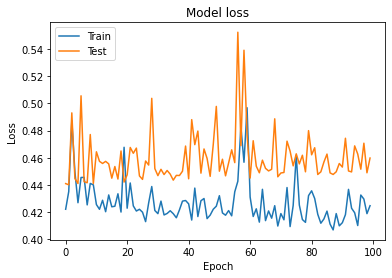

In [ ]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()


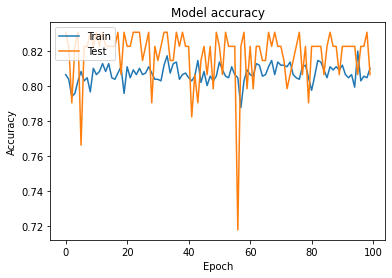

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()